# **<span style = 'color:green'>Advance NumPy </span>**

### **NumPy Array vs Python Lists**

In [2]:
# execution time using list

import time

# create list
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]

c = []
start = time.time() #starting time 
for i in range(len(a)):
    c.append(a[i] + b[i])

print(time.time()-start) # time after execution


4.813272714614868


In [3]:
# execution time using NumPy

import numpy as np

# create NumPy Array
a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()  # starting time

c = a + b

print(time.time()-start)  # time after execution


0.16922950744628906


- Python List execute in 4.81 seconds
- NumPy Array execute in 0.16 seconds
- Numpy Array is static array and not a refrential array
- Python List is dynamical array and refrential array 
- Numpy Array almost 50 times faster than Python List 

**<span style = 'color :orange'>Memory comparison (int32) between NumPy Array and Python Array</span>**

In [4]:
# create list
import sys

a = [i for i in range(10000000)]

sys.getsizeof(a)


89095160

In [5]:
# create NumPy Array

a = np.arange(10000000)

sys.getsizeof(a)


40000104

In [6]:
# you can change the memory type in NumPy Array

a = np.arange(10000000, dtype=np.int16)

sys.getsizeof(a)


20000104

### **<span style = 'color:blue'>Advance Indexing</span>**

In [8]:
# ----> fancy Indexing <----

# create Array
a = np.arange(12).reshape(4, 3)
a


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
'''Extract 1st,3rd and 4th row -> not possible in normal indexing'''
a[[0, 2, 3]]    # provide a list and write number of rows like 0th, 2nd and 3rd row


array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [11]:
''' Extract 2nd and 3rd colon'''

a[:, [1, 2]] # a[all rows :, [2nd col, 3rd col]]


array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

In [12]:
# ----> Boolean Indexing <----
a = np.random.randint(1, 100, 24).reshape(6, 4)
a


array([[28, 36, 91, 79],
       [30, 23, 21, 27],
       [58,  4,  4, 40],
       [68, 46, 67, 33],
       [66, 93,  5, 12],
       [12, 60, 59, 32]])

In [13]:
# find all numbers greater than 50
a > 50


array([[False, False,  True,  True],
       [False, False, False, False],
       [ True, False, False, False],
       [ True, False,  True, False],
       [ True,  True, False, False],
       [False,  True,  True, False]])

In [15]:
# you are getting those number which are greater than 50
a[a > 50]


array([91, 79, 58, 68, 67, 66, 93, 60, 59])

In [16]:
# find out even number

a % 2 == 0


array([[ True,  True, False, False],
       [ True, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True, False, False],
       [ True, False, False,  True],
       [ True,  True, False,  True]])

In [17]:
# all even numbers
a[a % 2 == 0]


array([28, 36, 30, 58,  4,  4, 40, 68, 46, 66, 12, 12, 60, 32])

In [18]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]


array([58, 68, 66, 60])

### **<span style = 'color:brown'>Broadcasting</span>**
The term broadcasting describe how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is "broadcast" across the larger array so that they have compatible shapes.

In [20]:
# same shape
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)

print('a:\n', a)
print('b:\n', b)

print('a + b :\n', a + b)


a:
 [[0 1 2]
 [3 4 5]]
b:
 [[ 6  7  8]
 [ 9 10 11]]
a + b :
 [[ 6  8 10]
 [12 14 16]]


In [21]:
# different shape

a = np.arange(6).reshape(2, 3)
b = np.arange(3).reshape(1, 3)

print('a:\n', a)
print('b:\n', b)

print('a + b :\n', a + b)


a:
 [[0 1 2]
 [3 4 5]]
b:
 [[0 1 2]]
a + b :
 [[0 2 4]
 [3 5 7]]


## **<span style = 'color :#143F6B'>Broadcasting Rules </span>**

**1. Make the two arrays have the same number of dimensions.**
  - If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the size 1 to the head of the array with the smaller dimension.

**2. Make each dimension of the two arrays the same size.**
  - If the sizes of each dimensions of the two arrays do not match, dimensions with size 1 are streched to the size of the other array.
  - If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [23]:
# more example

a = np.arange(12).reshape(4, 3)
b = np.arange(3)

print('a:\n', a)
print('b:\n', b)

print('a+b: \n', a + b)


a:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
b:
 [0 1 2]
a+b: 
 [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [24]:
# Error - > read rules 
a = np.arange(12).reshape(3, 4)
b = np.arange(3)

print('a:\n', a)
print('b:\n', b)

print('a+b: \n', a + b)


a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b:
 [0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [25]:
# example
a = np.arange(3).reshape(1, 3)
b = np.arange(3).reshape(3, 1)

print('a:\n', a)
print('b:\n', b)

print('a+b: \n', a + b)


a:
 [[0 1 2]]
b:
 [[0]
 [1]
 [2]]
a+b: 
 [[0 1 2]
 [1 2 3]
 [2 3 4]]


In [26]:
# example
a = np.arange(3).reshape(1, 3)
b = np.arange(4).reshape(4, 1)

print('a:\n', a)
print('b:\n', b)

print('a+b: \n', a + b)


a:
 [[0 1 2]]
b:
 [[0]
 [1]
 [2]
 [3]]
a+b: 
 [[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [27]:
# example

a = np.array([1])
# shape -> (1,1)

b = np.arange(4).reshape(2, 2)
# shape -> (2,2)

print('a: \n,', a)
print('b: \n', b)

print('a + b:\n', a + b)


a: 
, [1]
b: 
 [[0 1]
 [2 3]]
a + b:
 [[1 2]
 [3 4]]


In [29]:
#  error - > read rules -> increase dimension from 1 

a = np.arange(16).reshape(4, 4)
b = np.arange(4).reshape(2, 2)

print('a: \n,', a)
print('b: \n', b)

print('a + b:\n', a + b)


a: 
, [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
b: 
 [[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### **<span style = 'color : #F37121 '>Working with mathematical formulas</span>**

In [34]:
# sigmoid
def sigmoid(array):
    return 1/(1 + np.exp(-(array)))


a = np.arange(10)
sigmoid(a)


array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [35]:
# mean squared error
actual = np.random.randint(1, 50, 25)
predicted = np.random.randint(1, 50, 25)

print('actual :', actual)
print('predicted :', predicted)


actual : [35 20 31 12 19 18  3  1 21 17 18 16 38  5 35 43 49 17 29 36 30 34  4 27
 36]
predicted : [ 9 18 14 39 49 26 49 31 24 29 17 16 29 32 39 20  2 49  6 31 15 36 12 14
 30]


In [36]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)


mse(actual, predicted)


458.88

In [37]:
# categorical cross entropy
np.mean((actual - predicted)**2)


458.88

### **<span style = 'color : #3E001F'> Working with missing values</span>**

In [43]:
# working with missing values -> np.nan
a = np.array([1, 2, 3, 4, np.nan, 6])
print(a)

print(np.isnan(a))

a[~np.isnan(a)]


[ 1.  2.  3.  4. nan  6.]
[False False False False  True False]


array([1., 2., 3., 4., 6.])

### **<span style = 'color : #0D7377'>Meshgrid</span>**

In [49]:

x = np.arange(0, 50)
y = np.arange(0, 100)

print('before meshgrid x: ', x)
print('before meshgrid y: ', y)

x, y = np.meshgrid(x, y)

print('after meshgrid x: \n', x)
print('after meshgrid y: \n', y)


before meshgrid x:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
before meshgrid y:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
after meshgrid x: 
 [[ 0  1  2 ... 47 48 49]
 [ 0  1  2 ... 47 48 49]
 [ 0  1  2 ... 47 48 49]
 ...
 [ 0  1  2 ... 47 48 49]
 [ 0  1  2 ... 47 48 49]
 [ 0  1  2 ... 47 48 49]]
after meshgrid y: 
 [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [97 97 97 ... 97 97 97]
 [98 98 98 ... 98 98 98]
 [99 99 99 ... 99 99 99]]


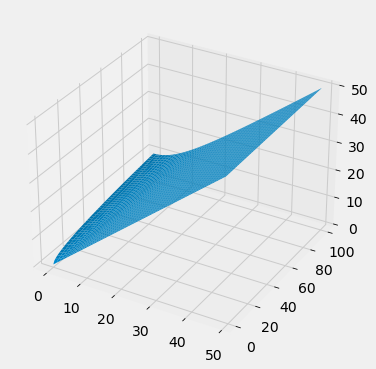

In [55]:
import matplotlib.pyplot as plt

z = np.sqrt(x**2 + y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()
